# Python performance tips

## A relatable problem: multivariate linear regression

In [1]:
import pandas as pd

test_dataset = pd.read_csv("test_regression.csv", index_col=0 )
test_dataset

,attribute0,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,...,attribute190,attribute191,attribute192,attribute193,attribute194,attribute195,attribute196,attribute197,attribute198,attribute199
person0,77,47,8,94,95,19,50,84,44,5,...,73,92,59,36,24,21,87,47,10,97
person1,64,61,92,38,21,11,86,66,15,3,...,89,35,67,88,51,92,89,32,50,20
person2,92,16,1,66,43,68,90,55,22,84,...,65,82,37,54,39,70,81,80,73,52
person3,34,57,50,68,97,32,67,41,51,39,...,82,22,25,69,72,23,42,80,24,95
person4,92,59,6,96,80,93,2,25,64,16,...,55,37,39,63,63,16,80,10,40,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person99995,50,73,25,29,85,8,22,53,43,2,...,89,72,60,74,32,85,18,84,31,79
person99996,21,63,92,71,4,40,19,24,19,81,...,79,48,73,81,73,56,44,74,82,33
person99997,65,44,47,7,59,10,51,77,59,61,...,41,89,6,31,48,10,78,98,91,56
person99998,57,19,58,88,96,21,80,29,90,17,...,93,70,22,12,4,87,64,20,6,35


## The key points I want to cover


<div style="text-align:left;"><img style="width:1000px" src="tips.png"></div>

## Benchmark first!

### Naive solution

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def naive_solution(test_dataset):
    
    reg = LinearRegression().fit(test_dataset[test_dataset.columns[1:]].values,test_dataset['attribute0'].values)
    np.median(reg.coef_)
    
    return reg.coef_

### Now do the profiling

In [39]:
%load_ext line_profiler

%lprun -f naive_solution naive_solution(test_dataset=test_dataset)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


## Easy parallelization

### Lets say you have to do the fitting for 8 of these dataframes!

In [42]:
def sum_of_lists(ls):
    '''Calculates the sum of an input list of lists'''
    
    s = 0
    for l in ls:
        for val in l:
            s += val
            
    return s

In [64]:
def sum_of_lists_parallel(ls):
    '''Calculates the sum of an input list of lists'''
    
    def sum_of_list(inls):
        
        s = 0
        for l in inls:
            
            s += l
            
        return s
    
    injobs = tqdm(ls)
    processed_list = Parallel(n_jobs=4)(delayed(sum_of_list)(inlist) for inlist in injobs)
            
    return sum(processed_list)

In [65]:
from joblib import Parallel, delayed
from tqdm import tqdm

test_dataset = list(range(10000))

input_data = [test_dataset, test_dataset, test_dataset, test_dataset, test_dataset, test_dataset, test_dataset, test_dataset]
sum_of_lists_parallel(input_data)









100%|██████████| 8/8 [00:00<00:00, 279.65it/s]


399960000

## Avoid for loops completely (Vectorization/SIMD)

In [66]:
def sum_of_lists_map(ls):
    '''Calculates the sum of an input list of lists'''

    return(sum(list(map(sum,ls))))

## Rewrite the heavier parts of your code in C/C++

## Use the GPU instead

## SIMD - Single Instruction Multiple Data

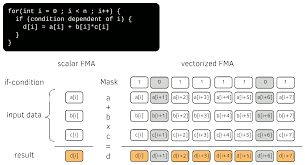

In [15]:
from IPython.display import Image
Image(filename='vect.png',width = 600, height = 300)

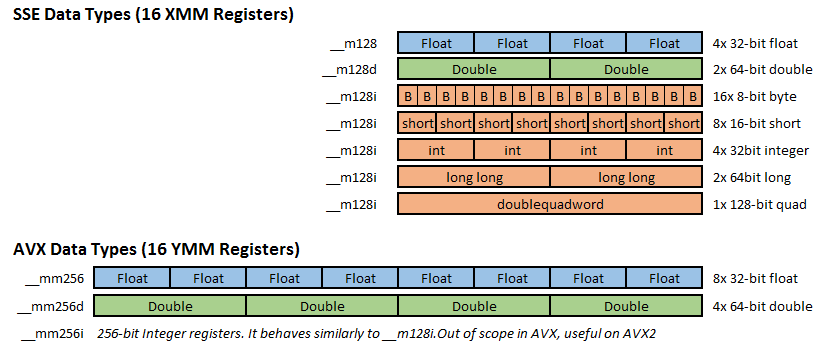

In [14]:
Image(filename='sse.png',width = 600, height = 300)

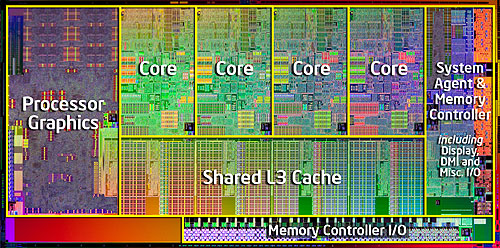

In [9]:
from IPython.display import Image
Image(filename='SandyBridgeDieMap.jpg',width = 600, height = 300)

In [1]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   36 bits physical, 48 bits virtual
CPU(s):                          4
On-line CPU(s) list:             0-3
Thread(s) per core:              1
Core(s) per socket:              4
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           42
Model name:                      Intel(R) Core(TM) i5-2400 CPU @ 3.10GHz
Stepping:                        7
CPU MHz:                         2576.227
CPU max MHz:                     3400.0000
CPU min MHz:                     1600.0000
BogoMIPS:                        6185.58
Virtualization:                  VT-x
L1d cache:                       128 KiB
L1i cache:                       128 KiB
L2 cache:                        1 MiB
L3 cache:                        

 ### From the Numpy source code on Github:

In [1]:
import random
import pandas as pd

people = []
f = pd.DataFrame()
for i in range(100000):
    
    people.append("person" + str(i))
    
for i in range(200):
    
    print("Done with loop " + str(i), end='\r')
    f["attribute" + str(i)] = [random.randint(1, 99) for _ in range(100000)]
    
f.index = people
f.to_csv("test_regression.csv")


In [ ]:
from IPython.display import Image
Image(filename='SandyBridgeDieMap.jpg')

In [ ]:
from IPython.display import Image
Image(filename='')